<h1 style="text-align: center;">Домашнее задание №16</h1>

# Импорты и загрузка датасета

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use("cyberpunk")

In [3]:
train_df = pd.read_csv('../train_house_prices.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
pdf = PdfPages("Отчет_eda.pdf")

# Lineplot

In [7]:
text_for_lineplot = """
График имеет 'зубчатый' вид с переодически возрастающим трендом
(прерывания тренда связаны, скорее всего с глобальными историческими событиями),
наиболее сильные падения(рост) количества покупок жилья связаны с кризисом(ростом) в экономике.
"""

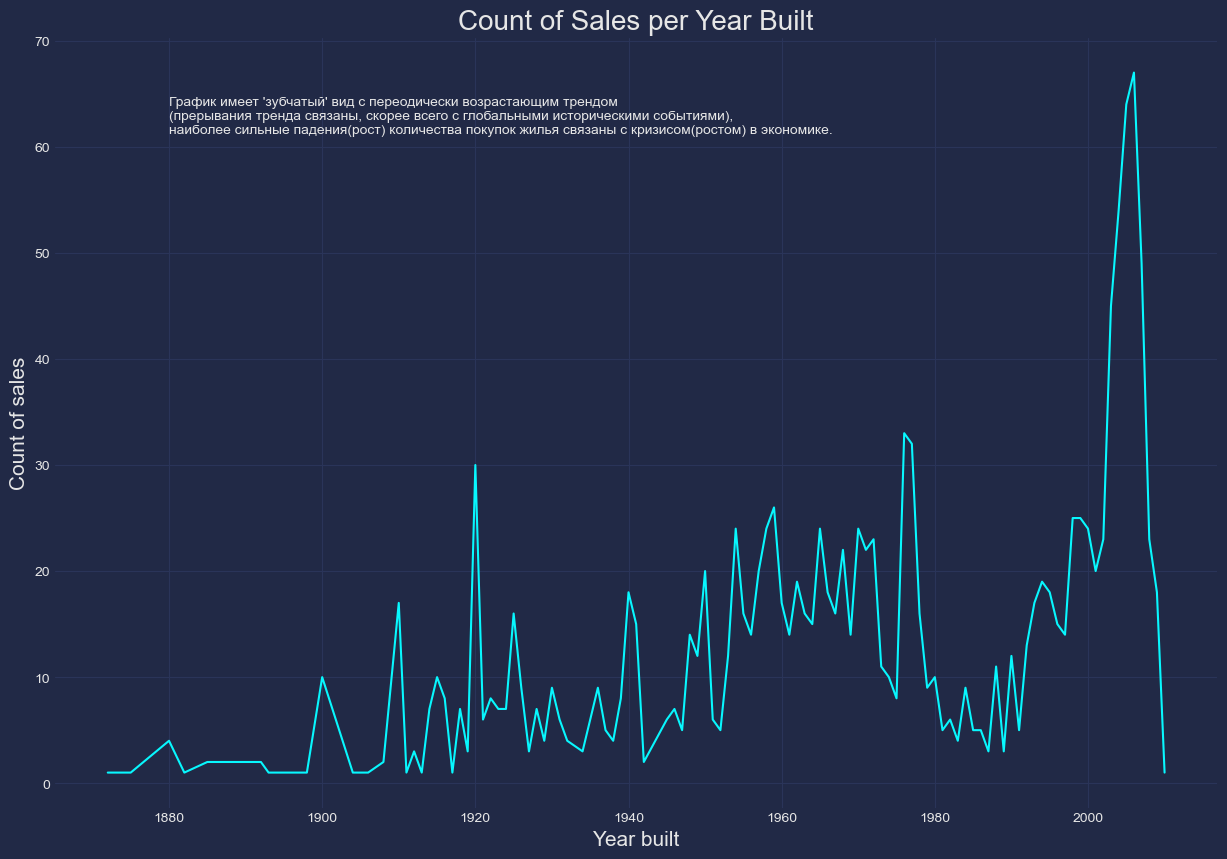

In [8]:
sales_count =  train_df.groupby('YearBuilt')['SalePrice'].count()

fig = plt.figure(figsize=(15,10))

sns.lineplot(x=sales_count.index, y=sales_count)

plt.title('Count of Sales per Year Built', fontsize=20)
plt.xlabel('Year built', fontsize=15) 
plt.ylabel('Count of sales', fontsize=15)
plt.text(1880, 60, text_for_lineplot)
pdf.savefig()
plt.show()

# Barplot

In [9]:
text_for_barplot = """
C увеличением количества каминов в доме
растет и средняя цена за дом, что в полне 
очевидно, поскольку это наиболее характерно
для частных домов.
"""

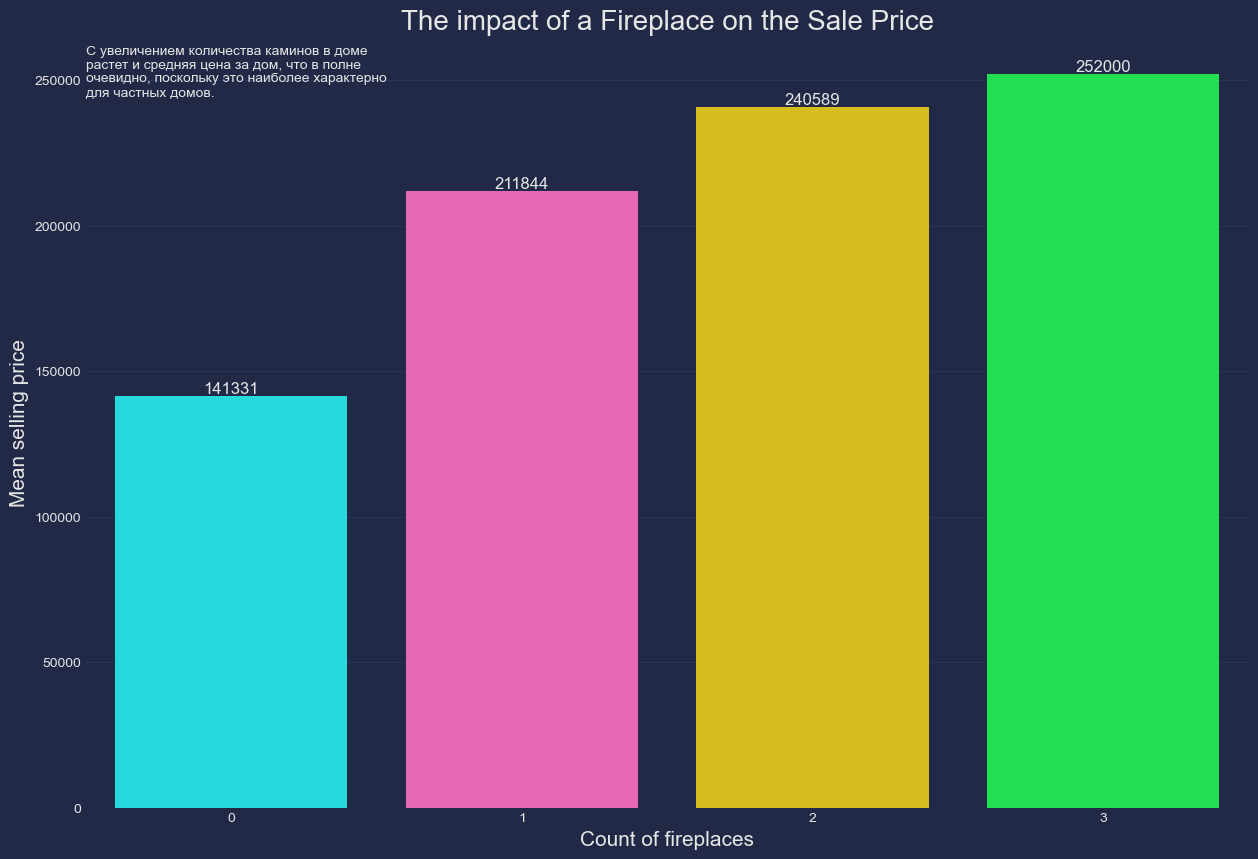

In [10]:
fig = plt.figure(figsize=(15,10))

ax = sns.barplot(train_df, x='Fireplaces', y='SalePrice', estimator="mean", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=12)

plt.title('The impact of a Fireplace on the Sale Price', fontsize=20)
plt.xlabel('Сount of fireplaces', fontsize=15) 
plt.ylabel('Mean selling price', fontsize=15)
plt.text(-0.5, 240000, text_for_barplot)
pdf.savefig()
plt.show()

# Histplot

In [11]:
text_for_histplot = """
Распределение цен похоже на нормальное,
но имеет тяжелые "хвосты". Само распределение
говорит о том, что популярностью пользуются дома
в ценовой категории от 100000 до 200000.
"""

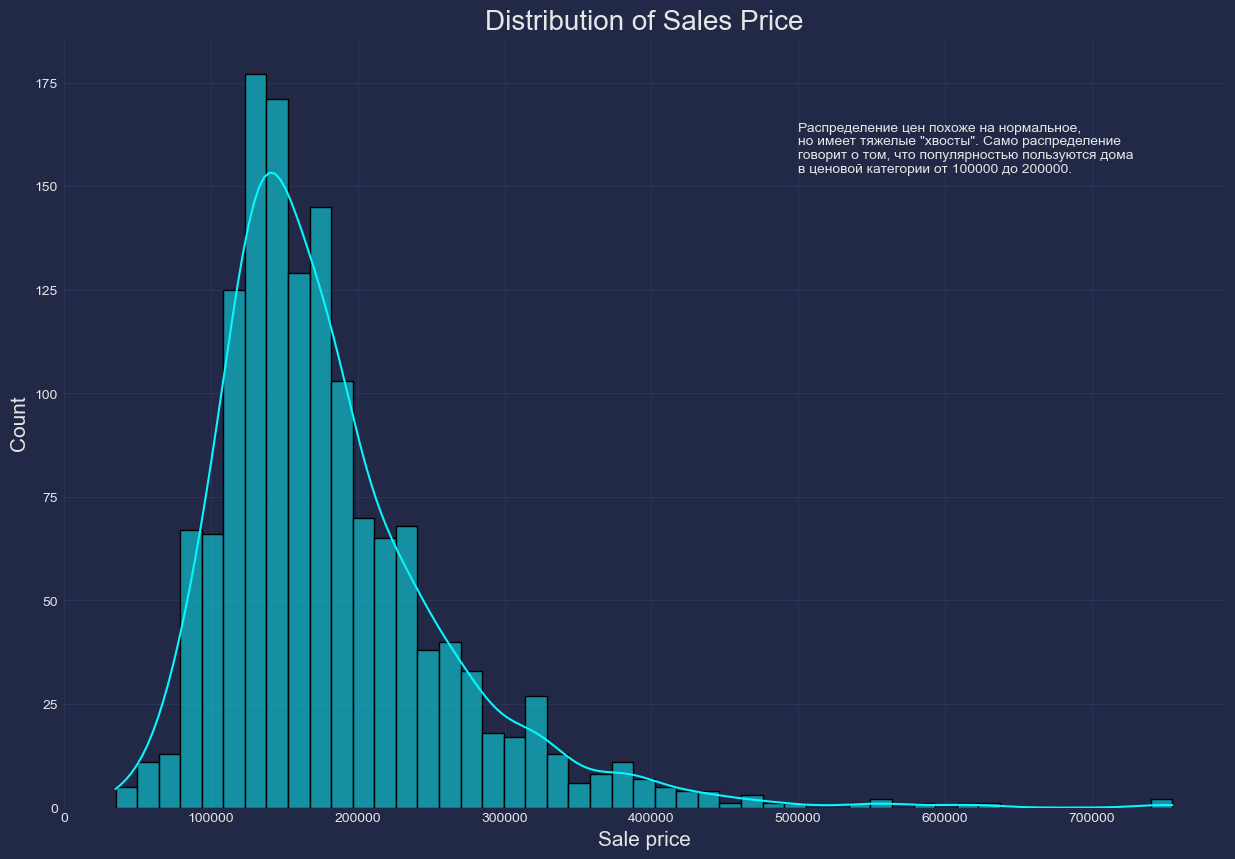

In [12]:
fig = plt.figure(figsize=(15,10))

sns.histplot(data=train_df, x='SalePrice', kde=True)

plt.title('Distribution of Sales Price', fontsize=20)
plt.xlabel('Sale price', fontsize=15) 
plt.ylabel('Count', fontsize=15) 
plt.text(500000, 150, text_for_histplot)
pdf.savefig()
plt.show()

# Boxplot

In [13]:
text_for_boxplot = """
На boxplot можно заметить, что чем лучше
финальная отделка дома, тем выше как медиана
распределения так и межквартильный размах в 
цене, а также растет величина разницы между выбросами
и максимумом. Это может объясняться наличием изысков в
отделке более дорогих домов. 
"""

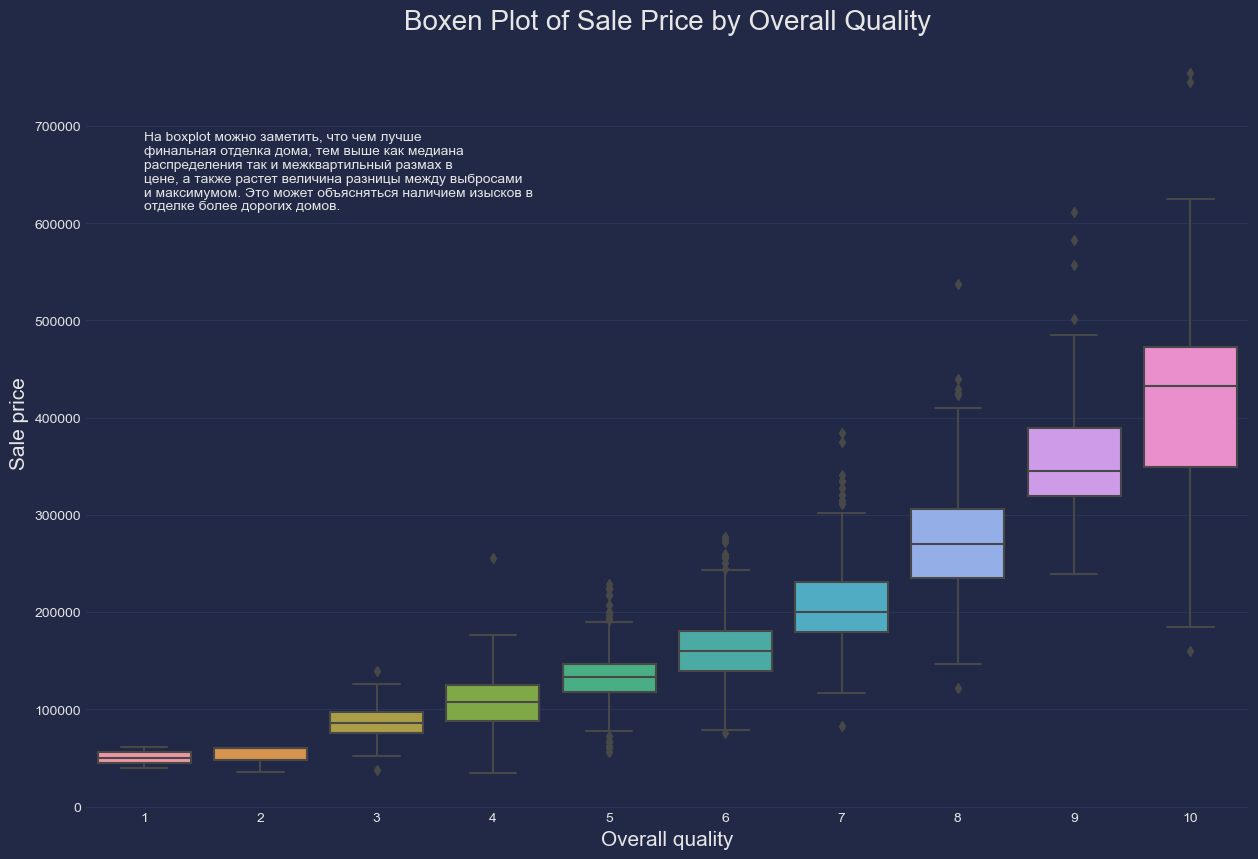

In [14]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(train_df, x='OverallQual', y='SalePrice')

plt.title('Boxen Plot of Sale Price by Overall Quality', fontsize=20)
plt.xlabel('Overall quality', fontsize=15) 
plt.ylabel('Sale price', fontsize=15) 
plt.text(0, 600000, text_for_boxplot)
pdf.savefig()
plt.show()

# Heatmap

In [15]:
discrete = []

for col in train_df.columns:
    if train_df[col].dtype == 'int64' and len(train_df[col].unique()) <= 15:
        discrete.append(col)
        
num = []

for col in train_df.columns:
    if train_df[col].dtype == 'int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)
        
df_corr = train_df[num].iloc[:,0:10]
df_corr['SalePrice'] = train_df['SalePrice']
corr = df_corr.corr()

In [16]:
text_for_heatmap = """
Наибольшая положительная корреляция наблюдается площадью первого этажа
и подвала - это вероятно может объяснятся тем, что изменение размера одной из величин, 
архитектурно не возможно без изменения другой, площадью цокольного этажа и ценой на дом - 
логично, что площадь дома при этом возрастает. Отрицательная корреляция между
отсутствием полной готовности подвала и готовность начального типа - тоже объективно
влияют друг на друга - если не доделан подвал, то и начальная готовность дома откладывается.
"""

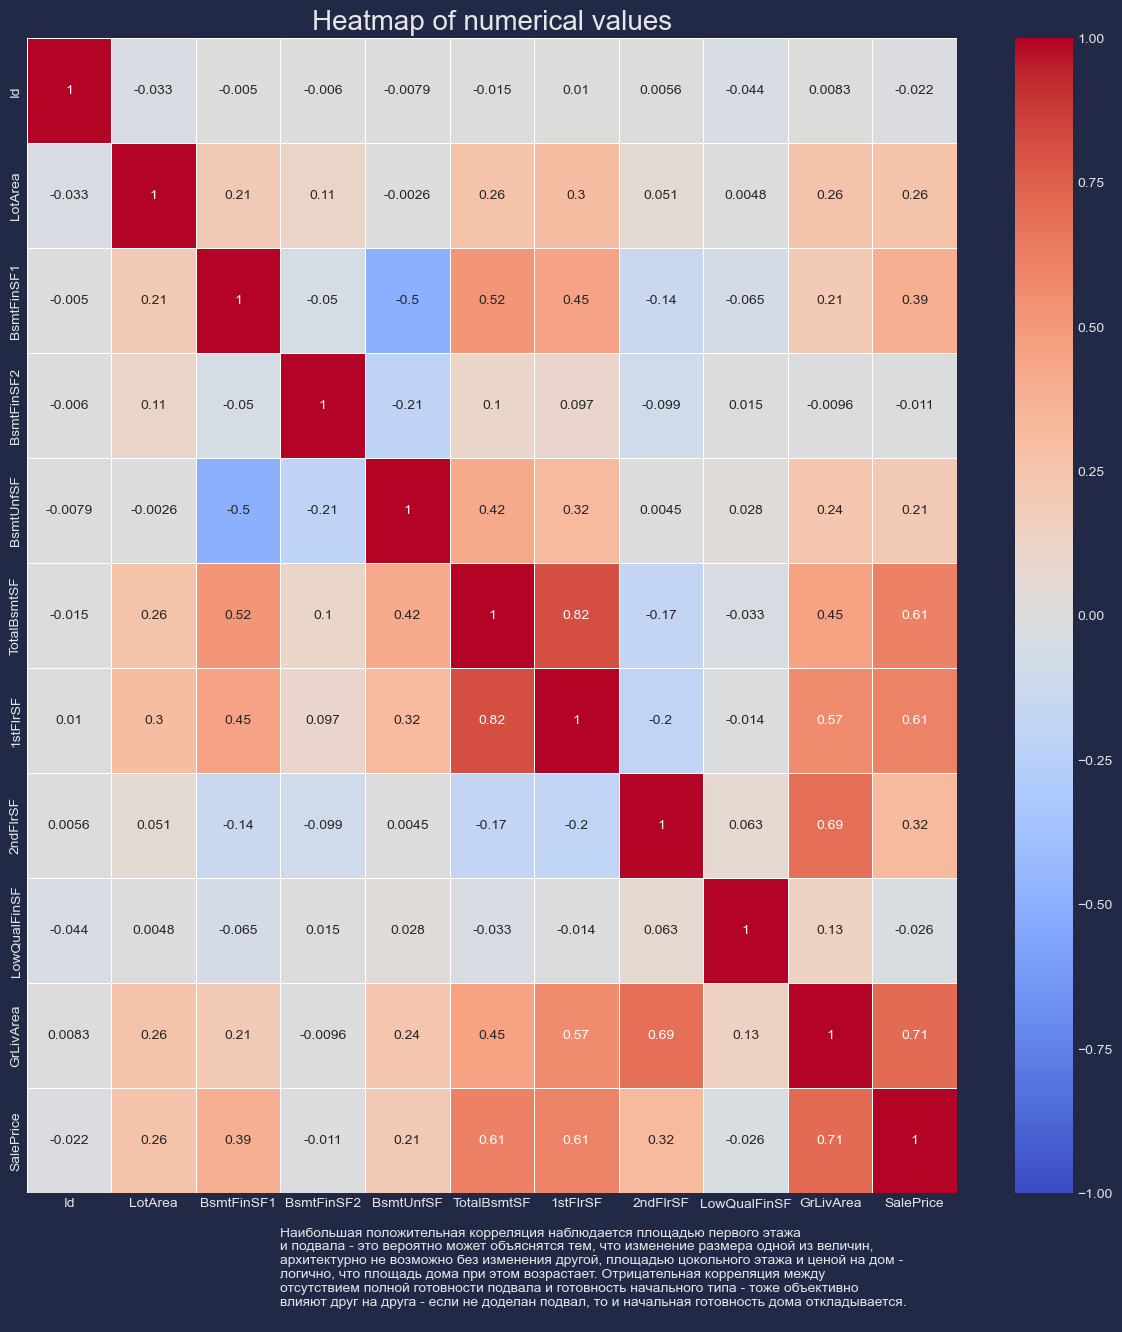

In [17]:
fig = plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Heatmap of numerical values', fontsize=20)  
plt.text(3, 12.2, text_for_heatmap)
pdf.savefig()
plt.show()

# Swarmplot

In [18]:
text_for_swarmplot = """
Swarmplot показывает, что большую
часть площади в домах предпочитают
делать кирпичной отделкой.
"""

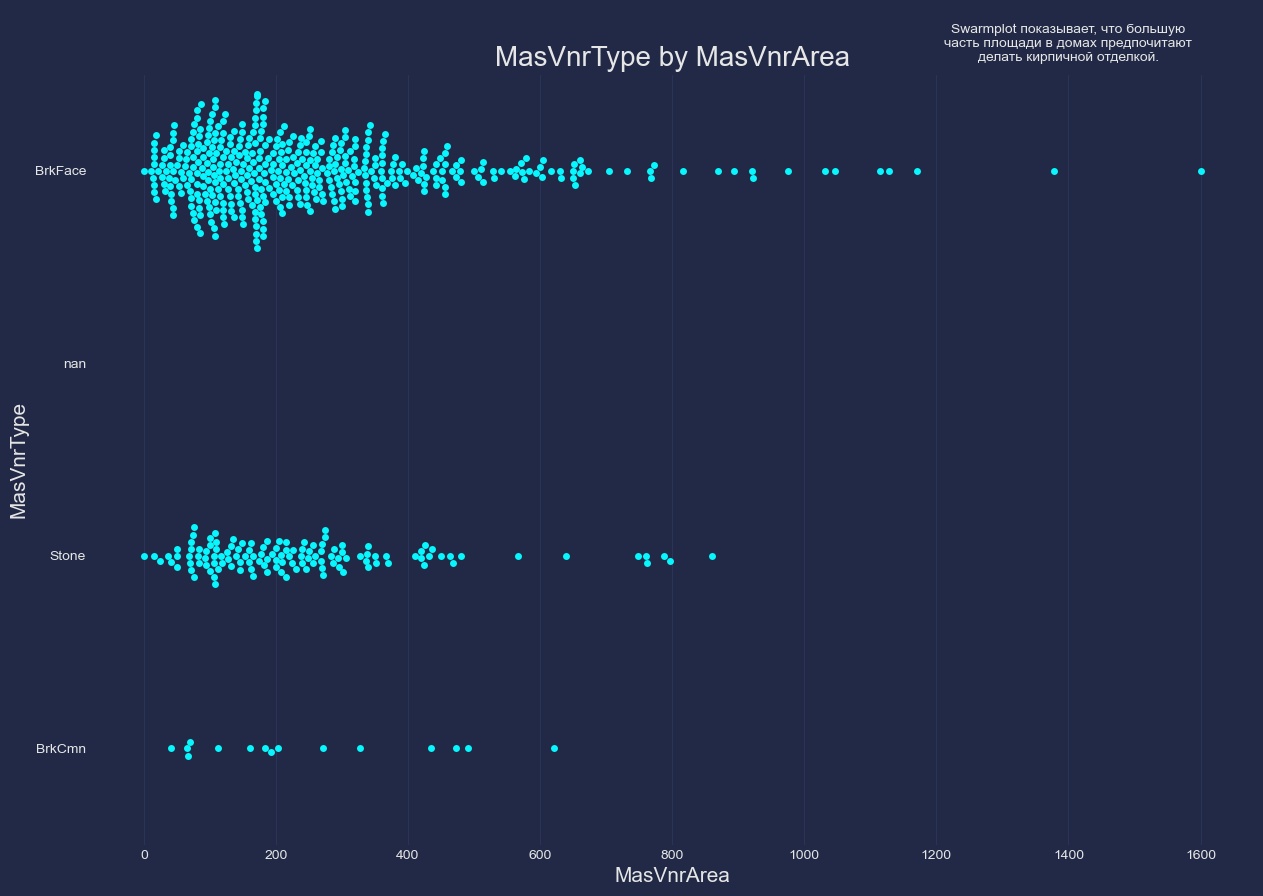

In [19]:
fig = plt.figure(figsize=(15,10))

sns.swarmplot(train_df, x="MasVnrArea", y="MasVnrType")

plt.title('MasVnrType by MasVnrArea', fontsize=20)  
plt.xlabel('MasVnrArea', fontsize=15) 
plt.ylabel('MasVnrType', fontsize=15) 
plt.text(1400, -0.5, text_for_swarmplot, ha='center')
pdf.savefig()
plt.show()

# Stripplot

In [20]:
text_for_stripplot = """
Из stripplot видно, что категория,
представляющая собой неплотную
жилую застройку явяляются превалирующими
в датасете, как в количестве, так и в
разбросе цен. Можно предположить, что
в датасете основными покупателями являются
семьи с детьми.
"""

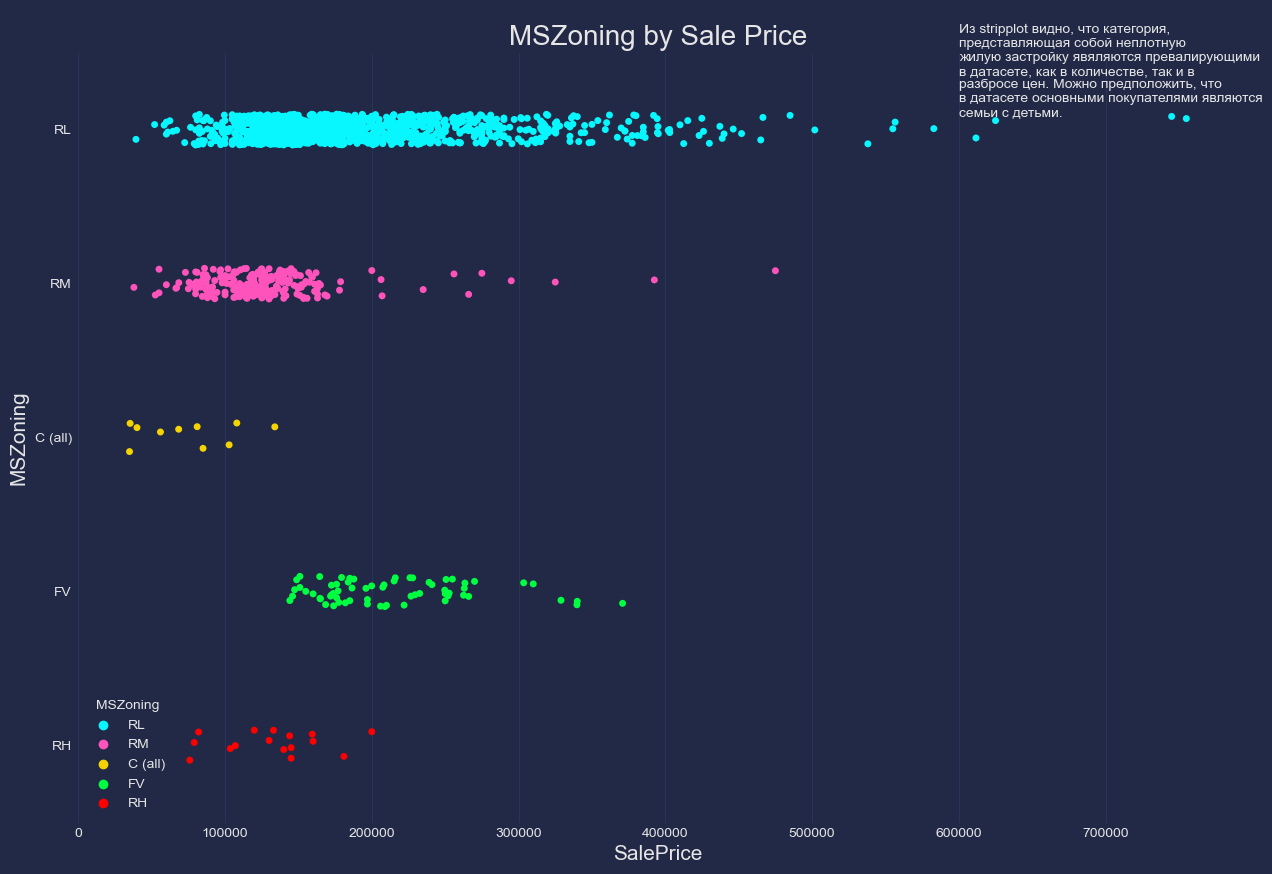

In [21]:
fig = plt.figure(figsize=(15,10))

sns.stripplot(train_df, x="SalePrice", y="MSZoning", hue='MSZoning')

plt.title('MSZoning by Sale Price', fontsize=20)  
plt.xlabel('SalePrice', fontsize=15) 
plt.ylabel('MSZoning', fontsize=15) 
plt.text(600000, 0, text_for_stripplot)
pdf.savefig()
plt.show()

In [22]:
pdf.close()